### データの読み込みと可視化

##### 日本語 - 英字変換
+ NO - NO
+ 申込日 - offer_date
+ 申込時間 - offer_time
+ 【媒体コード】大項目 - baitai_dai
+ 【媒体コード】詳細項目 - baitai_shousai
+ 受付時間帯区分 - uketsuke_jikantai
+ 受付形態区分 - uketsuke_keitai
+ 新規時自動契約機店番 - shinki_jidokeiyaku
+ 取扱店番 - toriatsukai_tenban
+ 管理店番 - kanri_tenban
+ 性別 - sex
+ 年齢 - age
+ 生年月日 - birth
+ ＪＩＳ住所コード - jis
+ 独既区分 - doku
+ 新職種区分_大区分 - sinshoku_dai
+ 【新職種区分】詳細区分 - sinshoku_shousai
+ 雇用形態区分 - koyo
+ 就業形態区分 - shugyo
+ 会社規模区分 - kaisha_kibo
+ 合計年収 - nenshu
+ 在社月数 - zaisha
+ 住居区分 - jukyo
+ 居住月数 - kyoju
+ 家賃負担額 - yachin
+ 家族構成区分 - kazoku_kousei
+ 保険職種区分 - hoken_shokushu
+ 収入証明有無 - shunyu_shoumei
+ 独身内訳 - dokushin
+ 同居区分 - doukyo
+ 扶養家族数 - fuyo
+ 扶養家族子供数 - fuyo_child
+ 所得証明区分 - shotoku_shoumei
+ 名義区分 - meigi
+ 事業形態区分 - jigyo_keitai
+ 事業所有無 - jigyosho
+ 貸付年月日 - kashituke_date
+ 貸付形態区分 - kashituke_keitai
+ 契約年率 - keiyaku_nenritsu
+ 解約時口座内訳 - kaiyakuji
+ 解約年月日 - kaiyaku_date
+ 解約時貸付残高 - kaiyaku_zandaka
+ １２ヶ月事故 - month12_jiko

In [1]:
import pandas as pd

df = pd.read_csv("モデル構築用.csv", encoding="sjis")
origin_columns = df.columns
df.columns = ["offer_date","NO","offer_time","baitai_dai","baitai_shousai","uketsuke_jikantai","uketsuke_keitai","shinki_jidokeiyaku","toriatsukai_tenban","kanri_tenban","sex","age","birth","jis","doku","sinshoku_dai","sinshoku_shousai","koyo","shugyo","kaisha_kibo","nenshu","zaisha","jukyo","kyoju","yachin","kazoku_kousei","hoken_shokushu","shunyu_shoumei","dokushin","doukyo","fuyo","fuyo_child","shotoku_shoumei","meigi","jigyo_keitai","jigyosho","month12_jiko"]

df.head()

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,2013/2/3,1.820570e+12,133504,3,2,3,502,0,182,182,...,0,1,2,0,0,0,0,6,0,0
1,2013/6/18,5.050290e+12,145329,5,99,0,1,2814,2814,505,...,0,0,1,2,1,0,0,0,0,0
2,2013/6/28,1.820590e+12,115136,5,99,0,1,2779,2779,182,...,1,0,1,1,0,8,1,0,0,0
3,2013/8/9,1.270660e+12,95034,5,99,0,1,223,223,127,...,0,1,2,0,0,0,0,0,0,0
4,2014/1/27,2.090350e+12,165240,5,99,0,1,1836,1836,209,...,0,0,2,0,0,0,0,0,0,0


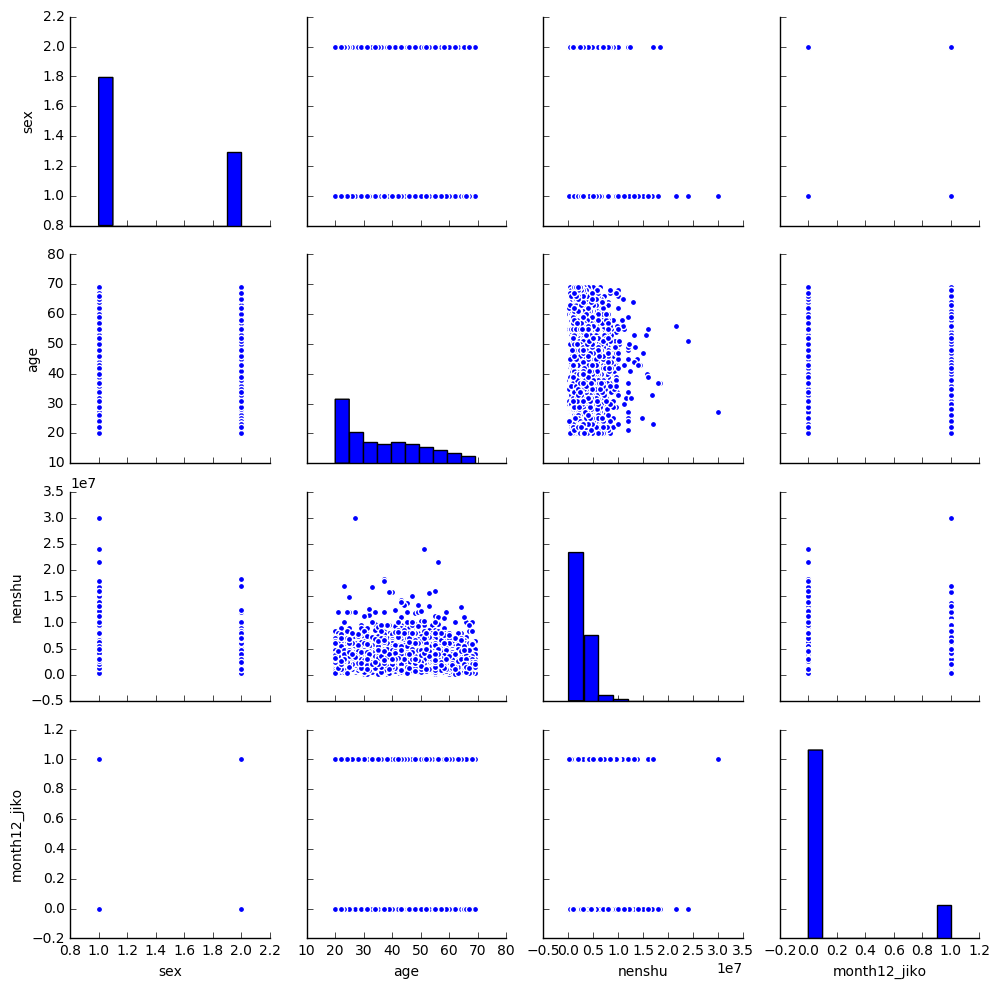

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["sex","age","nenshu","month12_jiko"]
sns.pairplot(df[cols])
plt.show();

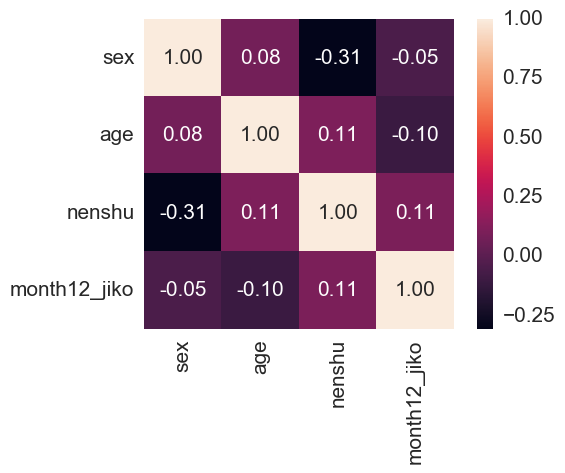

In [3]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show();

### 重回帰による各項目の関連度分析

#### 手法: 重回帰分析
事故発生フラグと各変数間の相関を調べ、どの変数が事故発生の起因となっているかについて調査する

In [4]:
import statsmodels.api as sm

X = df[cols].drop('month12_jiko', 1)
Y = df['month12_jiko']

# 正規化する
X = (X - X.mean()) / X.std()
X.head()

,sex,age,nenshu
0,-0.705477,-0.021947,0.105499
1,-0.705477,-0.881606,-0.254049
2,-0.705477,0.121329,1.200920
3,-0.705477,0.479521,0.105499
4,-0.705477,1.124265,0.704745


In [5]:
X = sm.add_constant(X)

model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           month12_jiko   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     90.28
Date:                Sat, 16 Mar 2019   Prob (F-statistic):           1.10e-57
Time:                        12:20:14   Log-Likelihood:                -4028.6
No. Observations:               10628   AIC:                             8065.
Df Residuals:                   10624   BIC:                             8094.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1509      0.003     44.006      0.000       0.144       0.158
sex           -0.0013      0.004     -0.355      0.722      -0.008       0.006
age           -0.0417      0.003    -11.997      0.000      -0.049      -0.035
nenshu         0.0423      0.004     11.619      0.000       0.035       0.049
==============================================================================
Omnibus:                     3331.102   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7542.392
Skew:                           1.877   Prob(JB):                         0.00
Kurtosis:                       4.713   Cond. No.                         1.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# 影響度を表すt値よりヒートマップを作成
import matplotlib.pyplot as plt
import seaborn as sns

df_t = pd.DataFrame(data=result.tvalues, columns=["t"])
plt.figure(figsize=(9, 6))
sns.heatmap(df_t);

### 時系列として季節性やトレンドの分析をする

#### 手法: 季節性分析/トレンド分析
年間で特定の時期に事故が発生しやすいか、過去に比べて現在は徐々に事故件数が増えてきているのかなど、年間を通した事故発生の分析を時間の流れに沿って行う。

※ 後ほど追加

In [7]:
import datetime

# 月ごとに事故発生件数を集計する
df_date = df
df_date["offer_date"] = pd.to_datetime(df_date["offer_date"])
df_date = df_date.set_index("offer_date")
df_ymw = df_date.set_index([df_date.index.year, df_date.index.month, df_date.index.week, df_date.index])
df_ymw.index.names = ['year', 'month', 'week', 'date']
df_ymw_sum = df_ymw.sum(level=["year", "month", "week"])
df_ymw_sum = df_ymw_sum.reset_index()
to_int = lambda x: int(np.asscalar(x))
df_ymw_sum["offer_date"] = df_ymw_sum.apply(lambda row: "{}{:02}{:02}".format(to_int(row["year"]),to_int(row["month"]),to_int(row["week"])), axis=1)
df_ymw_sum = df_ymw_sum.drop(["year", "month", "week"], axis=1)
df_ymw_sum = df_ymw_sum.set_index("offer_date")
df_ymw_sum

,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,sex,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
offer_date,,,,,,,,,,,,,,,,,,,,,
20130205,1.820570e+12,133504,3,2,3,502,0,182,182,1,...,0,1,2,0,0,0,0,6,0,0
20130625,5.050290e+12,145329,5,99,0,1,2814,2814,505,1,...,0,0,1,2,1,0,0,0,0,0
20130626,1.820590e+12,115136,5,99,0,1,2779,2779,182,1,...,1,0,1,1,0,8,1,0,0,0
20130832,1.270660e+12,95034,5,99,0,1,223,223,127,1,...,0,1,2,0,0,0,0,0,0,0
20140105,2.090350e+12,165240,5,99,0,1,1836,1836,209,1,...,0,0,2,0,0,0,0,0,0,0
20140311,1.270710e+12,161901,5,99,0,1,2817,2817,127,1,...,0,0,1,0,0,0,3,0,0,0
20140312,1.103820e+11,65230,3,2,0,1801,0,4182,11,2,...,0,0,1,3,3,0,0,0,0,0
20140416,3.200500e+12,152643,3,2,0,1801,0,4182,320,1,...,1,0,1,4,3,3,0,6,0,0
20140418,2.630630e+12,71307,3,2,0,1701,0,4182,263,1,...,0,0,1,3,2,0,0,0,0,0


In [8]:
# 事故件数を可視化する
df_jiko = df_ymw_sum["month12_jiko"]
# 2016年以前はほとんどデータがないので削除
df_jiko = df_jiko["20160101":]
df_jiko.plot(figsize=(16, 7), alpha=0.5);

In [9]:
import matplotlib.pyplot as plt

# 自己相関
acf = sm.tsa.stattools.acf(df_jiko, nlags=40)
# 偏自己相関
pacf = sm.tsa.stattools.pacf(df_jiko, nlags=40, method='ols')

# コレログラムで可視化する
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_jiko, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_jiko, lags=40, ax=ax2)

/Users/keiichirosato/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [10]:
# 6週ごとに周期がありそうなので、季節成分の抽出
import matplotlib
matplotlib.rc('font', size=1)
sd = sm.tsa.seasonal_decompose(df_jiko, freq=6)
plt = sd.plot()
plt.set_figwidth(10)
plt.set_figheight(5)

In [11]:
# 定常性を持つか検定
# 拡張Dickey-Fuller検定(ADF検定)
res = sm.tsa.stattools.adfuller(df_jiko)
print('p-value = {:.4}'.format(res[1]))

p-value = 0.866


In [12]:
# p > 0.5より定常性を持たないことが分かったため、トレンドと季節成分を抽出する
# トレンド(差分)
df_jiko.diff().plot(title='trend', figsize=(12, 3));

In [13]:
# 季節調整
(df_jiko - sd.seasonal).plot(title='seasonal ajustment', figsize=(12, 3));

In [14]:
# トレンド(差分) + 季節調整
ajusted = (df_jiko - sd.seasonal)
ajusted = ajusted.dropna()
ajusted.plot(title='ajusted - trend & seasonal', figsize=(12, 3));

In [15]:
# 再度定常性の確認
res = sm.tsa.stattools.adfuller(ajusted)
print('p-value = {:.4}'.format(res[1]))

p-value = 0.8606


#### 定常性が確認できなかったため、トレンド+季節調整では効果がないことが分かった

### 貸倒れ事故の発生を予測する

#### 手法: ロジスティック回帰
単純パーセプトロンと同様のモデルであり、線形回帰モデルを2値分類に展開した予想モデル。

#### 手法2: ランダムフォレスト
説明変数が多数の場合において、各変数の寄与率を出しながら高速に分類学習する手法

In [16]:
# 訓練データと検証データを作成
import numpy as np

# 日時データは削除
ignore_cols = ['offer_date', 'birth']
data = df.drop(ignore_cols, 1)

# 60%を訓練データとして使用する
train_ratio = 0.6
# ランダムに並び替えて、訓練/検証データに分割
df_rand = data.reindex(np.random.permutation(data.index)).reset_index(drop=True)
train = df_rand[0:round(len(data)*train_ratio)]
validation = df_rand[round(len(data)*train_ratio):]

train.shape, validation.shape

((6377, 35), (4251, 35))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train = train.drop('month12_jiko', 1)
y_train = train['month12_jiko']

# 正規化する
X_train = (X_train - X_train.mean()) / X_train.std()
X_train = X_train.fillna(0)

# ロジスティック回帰で2値分類する
clf = LogisticRegression()
clf.fit(X_train, y_train)

/Users/keiichirosato/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
# 精度 - Accuracyで検証データで評価

X_val = validation.drop('month12_jiko', 1)
y_val = validation['month12_jiko']

# 正規化する
X_val = (X_val - X_val.mean()) / X_val.std()
X_val = X_val.fillna(0)

clf.score(X_val, y_val)

0.8868501529051988

### 貸付判定モデル

1. 予測結果から貸し出す顧客を決定
2. 貸し出す人には全員一律で25万円貸すことにする

In [19]:
# 提出用検証データを読み込む
submission = pd.read_csv("検証用.csv", encoding="sjis")
submission.columns = ["offer_date","NO","offer_time","baitai_dai","baitai_shousai","uketsuke_jikantai","uketsuke_keitai","shinki_jidokeiyaku","toriatsukai_tenban","kanri_tenban","sex","age","birth","jis","doku","sinshoku_dai","sinshoku_shousai","koyo","shugyo","kaisha_kibo","nenshu","zaisha","jukyo","kyoju","yachin","kazoku_kousei","hoken_shokushu","shunyu_shoumei","dokushin","doukyo","fuyo","fuyo_child","shotoku_shoumei","meigi","jigyo_keitai","jigyosho","kashitsuke"]

submission.head()

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,kashitsuke
0,2017/7/1,3.280000e+12,165952,2,2,1,502,0,328,328,...,0,0,1,0,0,0,3,0,0,NaN
1,2017/7/1,3.450000e+12,114538,1,99,1,1,1195,1195,345,...,1,0,1,0,0,4,0,0,0,NaN
2,2017/7/1,2.090000e+12,143126,5,99,1,1,247,247,209,...,0,0,1,0,0,0,0,0,0,NaN
3,2017/7/1,1.110000e+11,85715,1,99,1,1701,0,11,11,...,0,0,1,0,0,0,0,0,0,NaN
4,2017/7/2,5.050000e+12,211042,3,26,3,502,0,505,505,...,0,0,1,1,0,0,2,0,0,NaN


In [20]:
from scipy.special import expit

# 各顧客の事故発生予測
X_submission = submission.drop(ignore_cols, 1)
X_submission = X_submission.drop("kashitsuke", axis=1)
# 正規化
X_submission = (X_submission - X_submission.mean()) / X_submission.std()
X_submission = X_submission.fillna(0)
# 予測
pred = clf.predict(X_submission)

In [22]:
# 一律で25万円貸し出す
submission["kashitsuke"] = 250000
# 事故が発生すると予測された人には貸さない
submission["kashitsuke"] *= 1-pred
submission.head()

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,kashitsuke
0,2017/7/1,3.280000e+12,165952,2,2,1,502,0,328,328,...,0,0,1,0,0,0,3,0,0,250000
1,2017/7/1,3.450000e+12,114538,1,99,1,1,1195,1195,345,...,1,0,1,0,0,4,0,0,0,250000
2,2017/7/1,2.090000e+12,143126,5,99,1,1,247,247,209,...,0,0,1,0,0,0,0,0,0,250000
3,2017/7/1,1.110000e+11,85715,1,99,1,1701,0,11,11,...,0,0,1,0,0,0,0,0,0,250000
4,2017/7/2,5.050000e+12,211042,3,26,3,502,0,505,505,...,0,0,1,1,0,0,2,0,0,250000


In [23]:
# ヘッダー名を設定
submission.columns = origin_columns[:-1].tolist() + ["貸付金額"]

# 結果を提出用にCSVへ書き出す
submission.to_csv("提出サンプル1.csv", encoding="sjis")